<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [3]:
html=requests.get(url).text

Create a soup object


In [4]:
soup=BeautifulSoup(html, "html")

Scrape the `Language name` and `annual average salary`.


In [5]:
table=soup.find('table')
language=[]
avg_salary=[]
for row in table.find_all('tr'):
    cols = row.find_all('td') 
    language.append(cols[1].getText())
    avg_salary.append(cols[3].getText())

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
import pandas as pd
df=pd.DataFrame()
language.remove('Language')
avg_salary.remove('Average Annual Salary')

In [7]:
df['Language']=language
df['Average Annual Salary']=avg_salary

In [10]:
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '')
df['Average Annual Salary']= df['Average Annual Salary'].str.replace('$', '')
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)
df.sort_values(by=['Average Annual Salary'], ascending=True, inplace=True, ignore_index=True)
df.head(10)

C:\Users\Megaport\AppData\Local\Temp\ipykernel_6764\2864261085.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Annual Salary']= df['Average Annual Salary'].str.replace('$', '')


,Language,Average Annual Salary
0,PHP,84727
1,SQL,84793
2,C#,88726
3,R,92037
4,Go,94082
5,Java,101013
6,Javascript,110981
7,C++,113865
8,Python,114383
9,Swift,130801


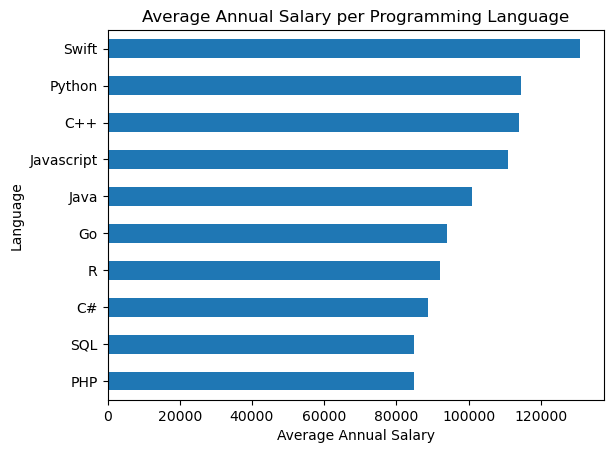

In [12]:
from matplotlib import pyplot as plt
df.plot.barh(x='Language', y='Average Annual Salary')
plt.xlabel('Average Annual Salary')
plt.legend('', frameon=False)
plt.title('Average Annual Salary per Programming Language')
plt.show()

In [ ]:
df.to_csv()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
